# Column Transformation

To obtain a prediction with a better performance, it is needed to evaluate if feature in the model. To this aim, each of them will be explored to see if they have a normal distribution since they will be more meaningful to the model in this way.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from modules.color_formater import colored

In [2]:
root = '../data/cars_reg.csv'

df = pd.read_csv(root)

df.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,price,...,warranty_NO,warranty_YES,dealer_Individual,dealer_Professional,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,2,99,157,270,145,4.3,780,33,13.7,5500,...,0.0,1.0,0.0,1.0,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957
1,3,179,140,426,235,7.6,1373,55,7.2,10900,...,0.0,1.0,0.0,1.0,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315
2,4,109,142,453,222,4.2,1545,42,8.5,36100,...,0.0,1.0,0.0,1.0,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315
3,5,142,162,467,212,5.4,1740,67,8.0,28000,...,0.0,1.0,0.0,1.0,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315
4,2,488,123,446,189,21.0,1546,70,3.9,27990,...,0.0,1.0,0.0,1.0,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315


## Represent curves distribution

In [3]:
X = df.drop('price', axis=1)

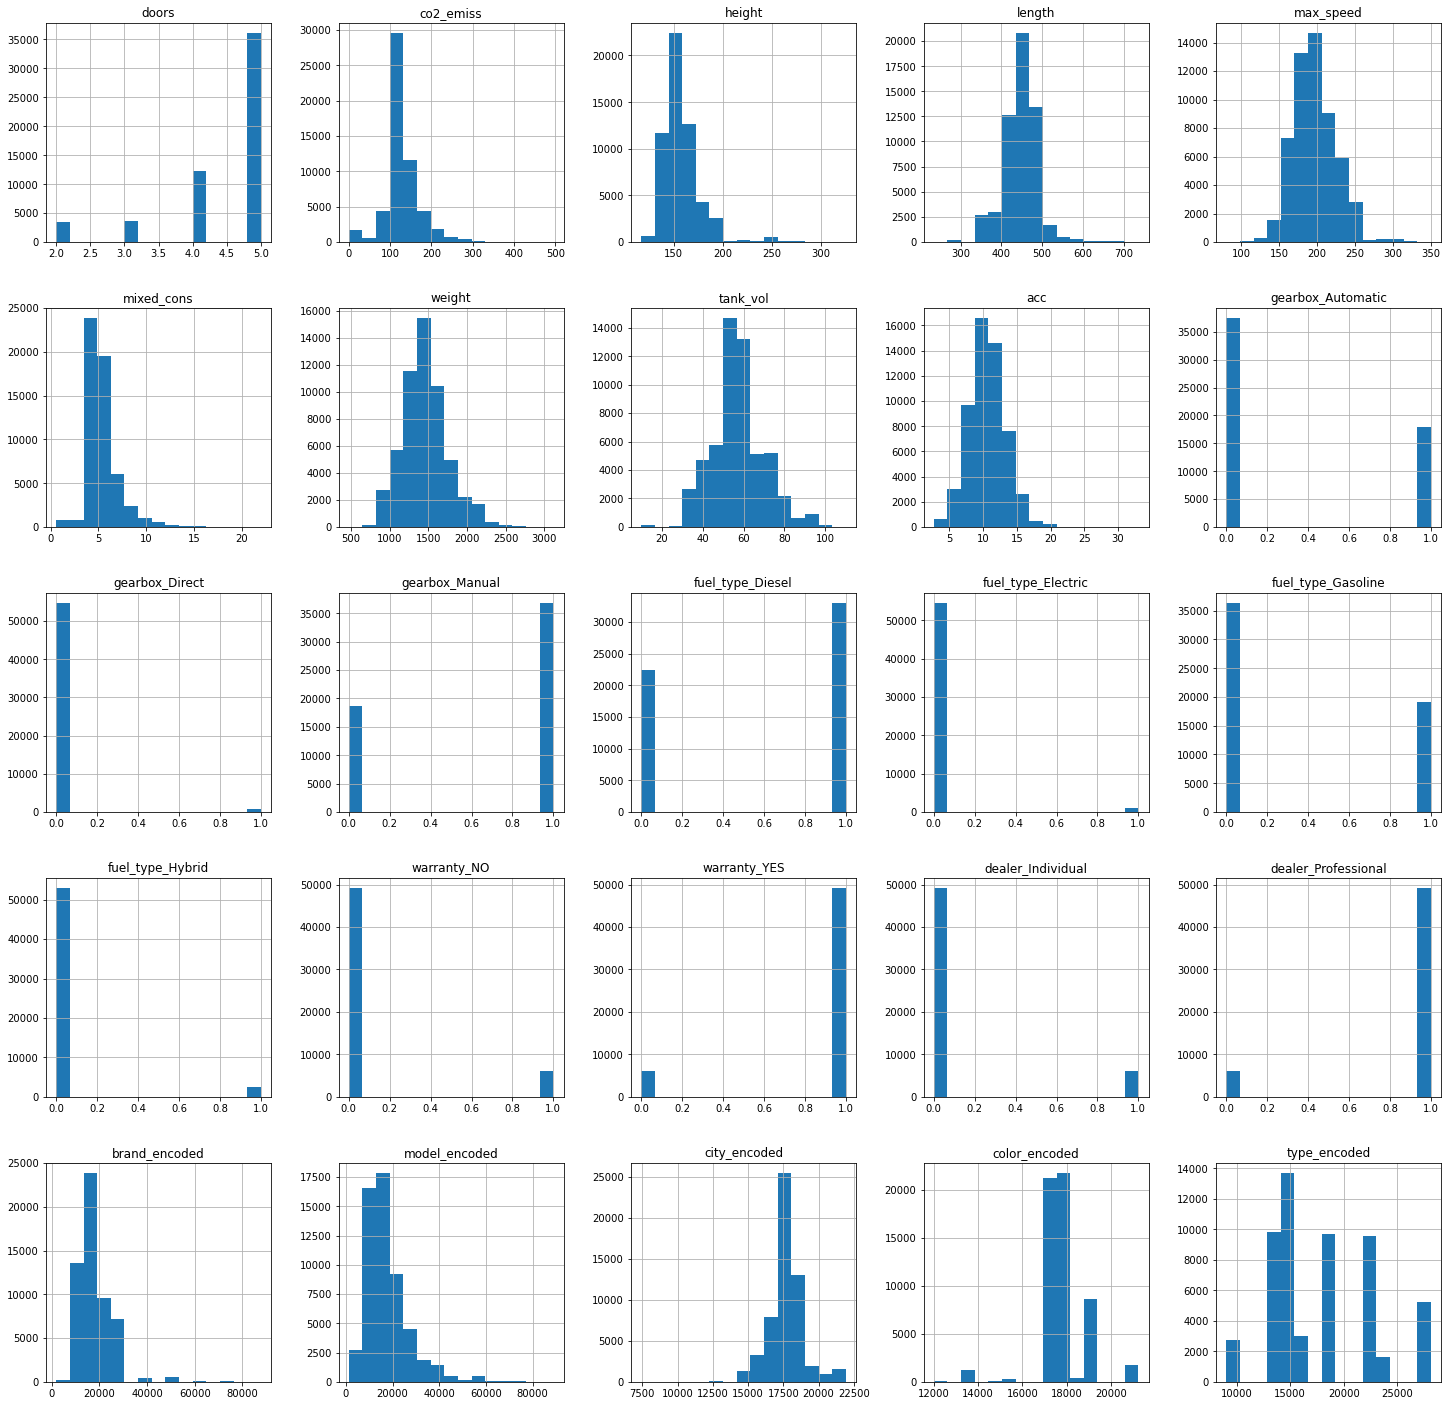

In [4]:
fig, axes = plt.subplots(len(X.columns)//5, 5, figsize=(25, 25))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column=X.columns[i], bins=15, ax=axis)
        i += 1

First, we notice that `doors` column is categorical, so it is better to apply a `Binarizer` to this column.

In [5]:
from sklearn.preprocessing import LabelBinarizer

In [6]:
lb = LabelBinarizer()
lb.fit(X['doors'])
doors_trf = lb.transform(X['doors'])

In [7]:
doors_cols = []
for e in X['doors'].unique().tolist():
    col = 'doors_' + str(e)
    doors_cols.append(col)

doors_cols

['doors_2', 'doors_3', 'doors_4', 'doors_5']

In [8]:
ohe_doors = pd.DataFrame(doors_trf, columns=doors_cols)
X = pd.concat([X, ohe_doors], axis=1)
X.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,gearbox_Automatic,...,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded,doors_2,doors_3,doors_4,doors_5
0,2,99,157,270,145,4.3,780,33,13.7,1.0,...,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957,1,0,0,0
1,3,179,140,426,235,7.6,1373,55,7.2,0.0,...,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315,0,1,0,0
2,4,109,142,453,222,4.2,1545,42,8.5,1.0,...,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315,0,0,1,0
3,5,142,162,467,212,5.4,1740,67,8.0,1.0,...,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315,0,0,0,1
4,2,488,123,446,189,21.0,1546,70,3.9,1.0,...,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315,1,0,0,0


In [9]:
X.drop('doors', axis=1, inplace=True)

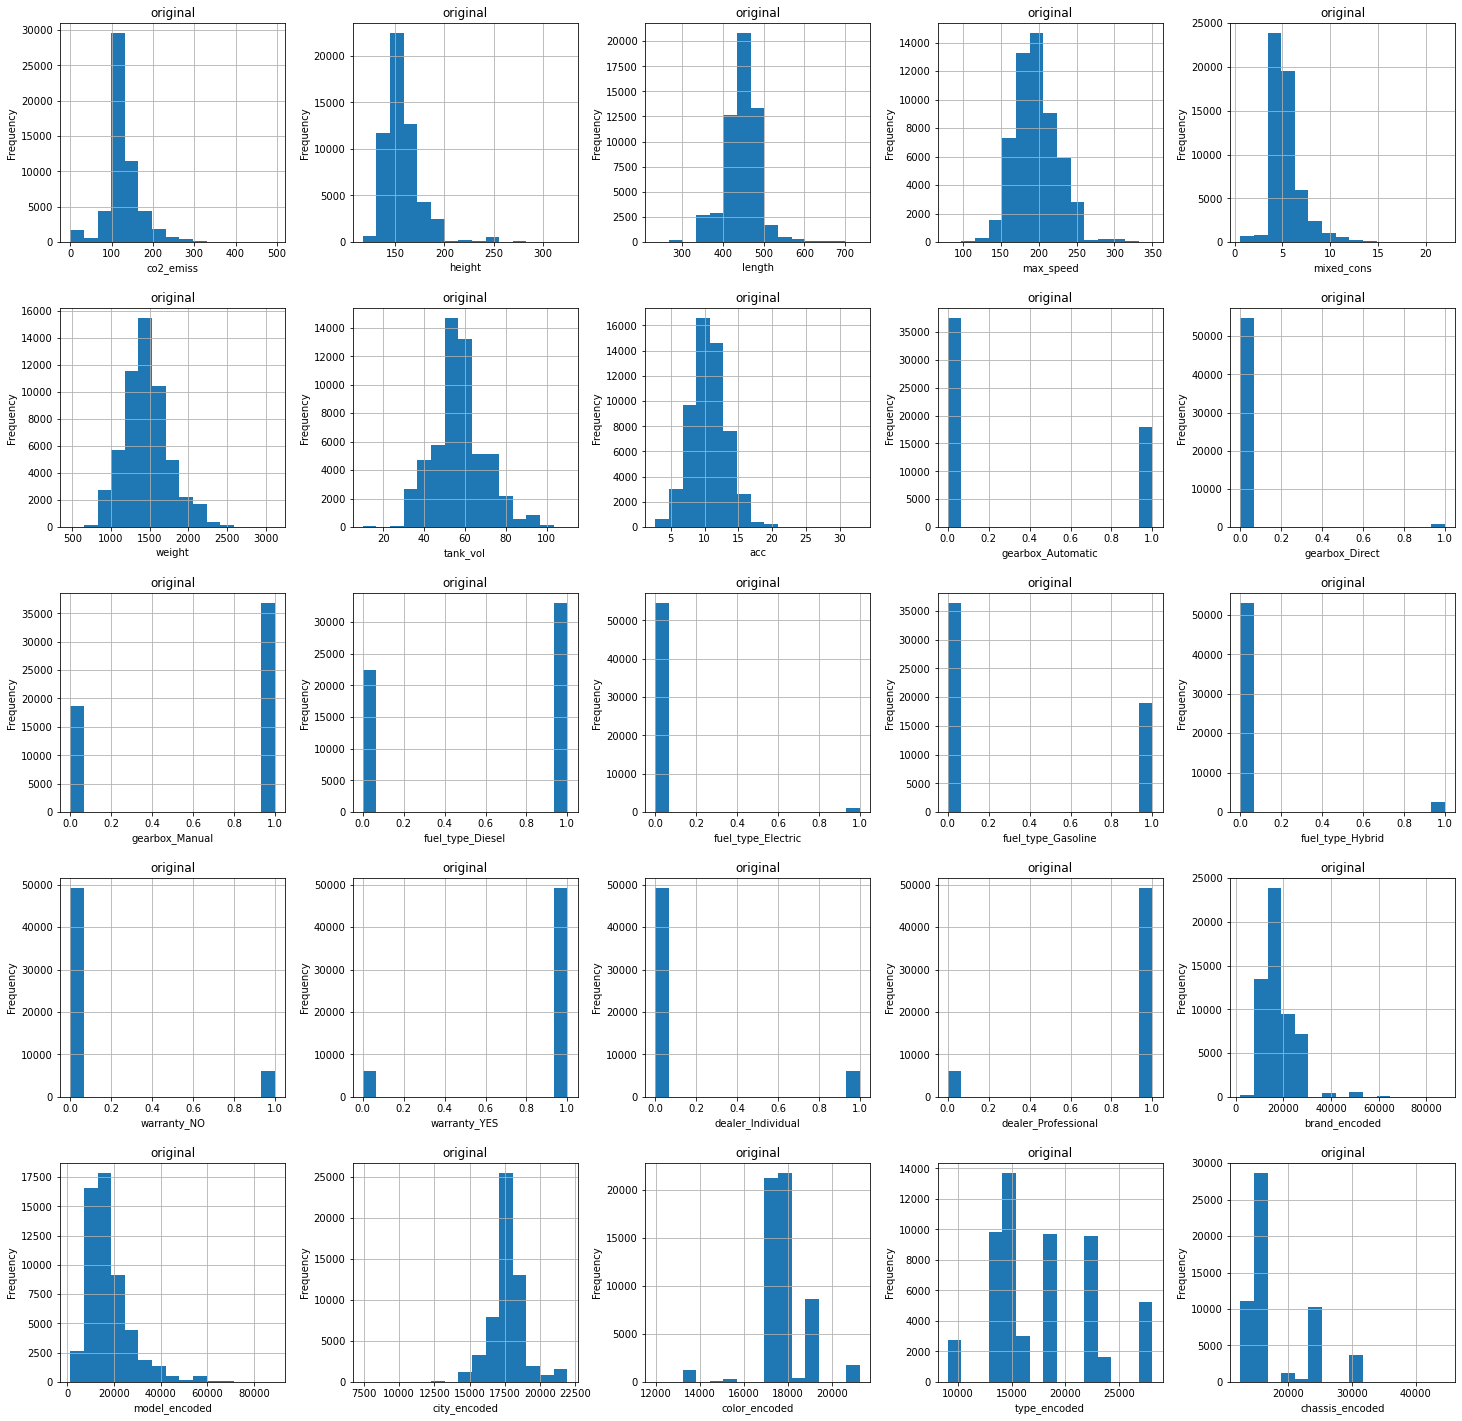

In [10]:
fig, axes = plt.subplots(len(X.columns)//5, 5, figsize=(25, 25))

i = 0
for pentaxis in axes:
    for axis in pentaxis:
        df.hist(column=X.columns[i], bins=15, ax=axis)
        axis.set_title('original')
        axis.set_xlabel(X.columns[i])
        axis.set_ylabel('Frequency')
        i += 1

### Separate binary columns (OneHotEncoded) from the ones with distributed values

In [11]:
ohe_mask = X.isin([0,1]).all()

X_ohe = X[X.columns[ohe_mask]]
X_dst = X[X.columns[~ohe_mask]]

display(X_ohe)
display(X_dst)

,gearbox_Automatic,gearbox_Direct,gearbox_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hybrid,warranty_NO,warranty_YES,dealer_Individual,dealer_Professional,doors_2,doors_3,doors_4,doors_5
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,1,0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55361,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
55362,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
55363,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1
55364,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1


,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,99,157,270,145,4.3,780,33,13.7,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957
1,179,140,426,235,7.6,1373,55,7.2,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315
2,109,142,453,222,4.2,1545,42,8.5,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315
3,142,162,467,212,5.4,1740,67,8.0,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315
4,488,123,446,189,21.0,1546,70,3.9,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55361,100,148,402,164,3.8,1237,45,14.8,12845.662341,11980.345216,18944.866410,16998.492107,24125.953305,15124.335073
55362,158,188,514,206,6.0,2145,67,9.1,26803.194521,40412.887500,17306.168324,19068.172062,24125.953305,14164.702259
55363,139,163,462,187,5.3,1828,60,10.9,25865.686411,28652.349939,15706.924710,17969.471689,24125.953305,23421.348833
55364,149,166,465,230,6.0,1800,67,6.2,23572.093803,29654.348315,18049.881613,16998.492107,24125.953305,23421.348833


## Power Transformations: Box-Cox and Yeo-Johnson

Many machine learning algorithms perform better when the distribution of variables is Gaussian. To this aim, `PowerTransformations` will be applied since they will make the probability distribution of a variable more Gaussian.

In [12]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [23]:
try:
    boxcox = PowerTransformer(method='box-cox', standardize=False)
    X_trf = boxcox.fit_transform(X)
except ValueError as e:
    print(colored(255, 148, 148, f'ValueError: {e}'))

ValueError: The Box-Cox transformation can only be applied to strictly positive data 


This error states that we cannot use the transform if the data is not `strictly positive`. Therefore, it is needed to firstly apply a `MinMaxScaler` using a `Pipeline`.

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [29]:
scaler = MinMaxScaler(feature_range=(1, 2))
boxcox = PowerTransformer(method='box-cox', standardize=False)
pipeline = Pipeline(steps=[('s', scaler), ('bc', boxcox)])

X_trf = pipeline.fit_transform(X)

X_trf = pd.DataFrame(X_trf, columns=X.columns)

X_trf

,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,gearbox_Automatic,gearbox_Direct,...,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded,doors_2,doors_3,doors_4,doors_5
0,0.179582,0.100531,0.070628,0.193163,0.115691,0.105536,0.201646,0.294110,0.271696,0.0,...,0.070799,0.078522,0.439096,0.628766,0.544251,0.103173,0.043605,0.000000,0.000000,0.000000
1,0.300875,0.073999,0.355322,0.361428,0.164313,0.263585,0.354506,0.135291,0.000000,0.0,...,0.093820,0.096922,0.523106,0.628766,0.544251,0.119550,0.000000,0.044444,0.000000,0.000000
2,0.195755,0.077976,0.401630,0.341758,0.113652,0.301143,0.268033,0.170080,0.271696,0.0,...,0.108553,0.141821,0.541077,1.286662,0.544251,0.119550,0.000000,0.000000,0.161365,0.000000
3,0.246990,0.105882,0.425344,0.325742,0.135540,0.340236,0.426103,0.156901,0.271696,0.0,...,0.108553,0.173285,0.467820,0.628766,0.544251,0.119550,0.000000,0.000000,0.000000,2.111358
4,0.648320,0.025755,0.389698,0.285624,0.220919,0.301353,0.442934,0.038587,0.271696,0.0,...,0.077576,0.119978,0.495828,0.688574,0.544251,0.119550,0.043605,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55361,0.181214,0.088383,0.313494,0.235970,0.105051,0.231573,0.288911,0.317688,0.000000,0.0,...,0.079023,0.090023,0.554695,0.628766,0.474621,0.058945,0.000000,0.000000,0.000000,2.111358
55362,0.270728,0.123489,0.503549,0.315735,0.144643,0.411533,0.426103,0.185576,0.271696,0.0,...,0.113448,0.179802,0.495828,0.936088,0.474621,0.042657,0.000000,0.000000,0.000000,2.111358
55363,0.242461,0.106853,0.416898,0.281899,0.133914,0.356790,0.385211,0.230106,0.000000,0.0,...,0.112152,0.156712,0.433690,0.769667,0.474621,0.111330,0.000000,0.000000,0.000000,2.111358
55364,0.257460,0.109586,0.421968,0.354010,0.144643,0.351592,0.426103,0.107325,0.271696,0.0,...,0.108553,0.159205,0.523106,0.628766,0.474621,0.111330,0.000000,0.000000,0.000000,2.111358


<Figure size 1800x1800 with 0 Axes>

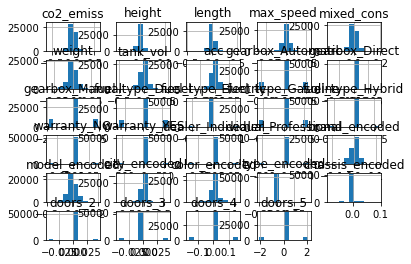

In [45]:
plt.figure(figsize=(25, 25))

X_trf.diff().hist()

plt.show()

## Standardizing columns: StandardScaler, MinMaxScaler

## PCA: Reduce Dimensionality